# <font color="maroon bold"> Text Classification with Spacy

In [1]:
import pandas as pd
import spacy 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [2]:
# Import Steam Reviews dataset from Local disc
df = pd.read_csv("..\\NLP_tasks\\data\\train.csv")

In [3]:
df.head(15)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


In [4]:
df = df[['user_review', 'user_suggestion']].dropna()
df.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [5]:
df.count()

user_review        17494
user_suggestion    17494
dtype: int64

In [6]:
df1 = df.user_suggestion.value_counts()

In [7]:
df1

1    9968
0    7526
Name: user_suggestion, dtype: int64

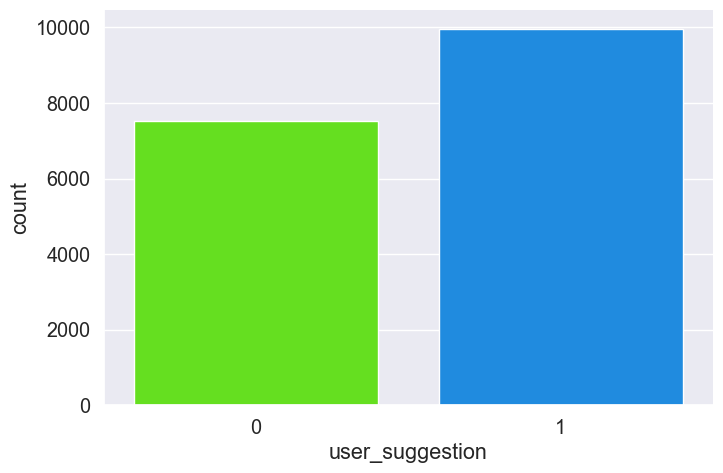

In [8]:
sns.catplot(x="user_suggestion", 
               data=df, 
               kind="count", 
               aspect=1.5,
               palette="gist_rainbow")
plt.show()

In [9]:
nlp=spacy.load("en_core_web_sm")
nlp.pipe_names 

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [78]:
from spacy.pipeline.textcat import Config, single_label_bow_config

nlp=spacy.load("en_core_web_sm")


config = Config().from_str(single_label_bow_config)

if "textcat" not in nlp.pipe_names:
    nlp.add_pipe('textcat', config=config, last=True)

textcat = nlp.get_pipe('textcat')
nlp.pipe_names


['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'textcat']

In [62]:
'''
The list of components in nlp.pipe_names represents the various processing components or pipelines that have been added to 
a spaCy NLP model. Each component performs a specific NLP task during the text processing pipeline. 
Here's a brief explanation of each of the components you listed:

'tok2vec': This component is responsible for converting text into vector representations, 
which are numerical representations that capture the meaning of words and their relationships in the context of a document.

'tagger': The tagger component assigns part-of-speech tags to each word in the text, indicating whether a word is a noun, 
verb, adjective, etc.

'parser': The parser component analyzes the syntactic structure of sentences, including identifying relationships 
between words, such as subject-verb relationships and dependency parsing.

'attribute_ruler': The attribute ruler is used for custom attribute setting and modification. 
It allows you to define rules for setting custom attributes on tokens.

'lemmatizer': The lemmatizer component reduces words to their base or dictionary form (lemmas). 
For example, it can convert "running" to "run."

'ner': The named entity recognition (NER) component identifies and categorizes named entities in the text, 
such as persons, organizations, locations, and more.

'textcat': The text classification (textcat) component, as you've added, is used for text categorization tasks, 
where it assigns predefined labels or categories to text documents.

These components work together in a specific order to process and analyze text documents. The order in which they
appear in nlp.pipe_names reflects the order in which they are applied to the input text during the NLP pipeline. 
Each component adds valuable information or features to the processed text, making it ready for various 
downstream NLP tasks like entity recognition or text classification.
'''

nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'textcat']

In [79]:
'''
"RECOMMEND" is for a recommended game and "DON'T BUY" shows if a review is not recommending the game
'''
#Adding labels to textcat
textcat.add_label("RECOMMENDED")
textcat.add_label("DON'T BUY")

1

In [80]:
# Converting the DF into a list of tuples
df["tuples"] = df.apply(lambda row: (row['user_review'], row['user_suggestion']), axis=1)
train = df['tuples'].tolist()
train[:10]

[("I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",
  1),
 ("Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bo

In [76]:
import random 
def load_data(limit=0, split=0.8):
    train_date = train
    #shuffle the data
    random.shuffle(train_date)
    texts,labels = zip(*train_date)
    #get categories for each review 
    cats = [{"RECOMMENDED": bool(y), "DON'T BUY": not bool(y)} for y in labels]
    
    #splitting the training and evaluation data 
    split = int(len(train_date)*split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split]) 

n_texts= 13995
    
# calling the load_data function 
(train_texts, train_cats), (dev_texts, dev_cats)=load_data(limit=n_texts)
    
# Processing the final format of training data
train_data = list(zip(train_texts, [{'cats' : cats} for cats in train_cats]))
train_data[:10]

[("Good game, spend quite some time on it sofar and it's enjoyable.The quests are mostly normal 'MMO quests' kill 10 x, get 3 x etc.There are somewhat more 'story' quests which involve some npc's saying things and some cutscenes.Pro's - Free- Fun to play, all classes offer something unique.- constanly being developed.- free expansions (as far as i can tell)- once you hit level 60 a whole new world opens up.Cons- Bag space/bank slots/character slots all need to be bought.- Without lots of grinding you can't compete at endgame with those that spend real money.- prices for basic things are a bit high.It's worth a try, if you got time to spare this game can fill it.",
  {'cats': {'RECOMMENDED': True, "DON'T BUY": False}}),
 ('Just don\'t, the community has died, the developers still don\'t listen to the community. The progression is a joke now more than ever. And as someone whose watched this game from infancy they\'re just adding anything flashy to their game to get you to pick it up and 

In [88]:
from spacy.util import minibatch, compounding
from spacy.training.example import Example

# (number of training iterations, n.....int")
n_iter = 15

# L2 regularization strength (adjust as needed)
l2_regularization = 1e-6


# disabling other components
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat' ]

with nlp.disable_pipes(*other_pipes):  # only training textcat
    optimizer = nlp.create_optimizer()
    
    print("Training the model....wait until it is finished before moving on to test")
    
    # perform the training 
    for i in range(n_iter):
        losses = {}  # Losses a type of dict, it is taking an optional record of the loss during training 
        random.shuffle(train_data)  # Shuffle data in each iteration
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            examples = []  # Create a list of Example objects for this batch
            for text, annotations in batch:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotations)
                examples.append(example)
            
            nlp.update(examples, 
                       sgd=optimizer, 
                       drop=0.2, 
                       losses=losses)  

        # Apply L2 regularization to the optimizer
        with textcat.model.use_params(optimizer.averages):
            for param_name in textcat.model.param_names:
                if 'ngram' not in param_name:  # Exclude ngram parameters from regularization
                    textcat.model.get_ref(param_name)[:] -= l2_regularization * textcat.model.get_grad(param_name)

    # Print the losses after each iteration
    print("Losses:", losses)

Training the model....wait until it is finished before moving on to test
Losses: {'textcat': 3.5293543511064294}


In [89]:
# Testing the model
#nlp.create_optimizer()
review ="the game was boring and we did not have any fun at all - I was very much so dissapointed"
doc=nlp(review)
doc.cats

{'RECOMMENDED': 0.12743383646011353, "DON'T BUY": 0.8725662231445312}

In [90]:
#nlp.create_optimizer()
review ="the best exciting flight simulator EVER!!!!!"
doc=nlp(review)
doc.cats

{'RECOMMENDED': 0.9842442274093628, "DON'T BUY": 0.01575581543147564}

In [91]:

review ="the game was long and it was not too bad but I had much better expectations and it's sad to say - i would not buy this game if i were you"
doc=nlp(review)
doc.cats

{'RECOMMENDED': 0.0017948184395208955, "DON'T BUY": 0.9982051849365234}

In [92]:

review ="this game is so much fun and i want to play this all day. I love this game so much" 
doc=nlp(review)
doc.cats

{'RECOMMENDED': 0.834985613822937, "DON'T BUY": 0.16501431167125702}

In [94]:
review ="this game got me bored in the first 5 mins." 
doc=nlp(review)
doc.cats

{'RECOMMENDED': 0.4654693305492401, "DON'T BUY": 0.5345306992530823}